리뷰데이터 가져오기 / 전처리

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 기본 패키지 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib as mpl
from matplotlib import font_manager, rc

# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 글꼴 경로 지정
font_path = '/content/drive/MyDrive/예진/malgun.ttf'

# 폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

# matplotlib의 rc(run command) 기능을 이용하여 글꼴 설정
mpl.rc('font', family=font_name)

# 유니코드에서  음수 부호 설정
mpl.rc('axes', unicode_minus=False)

# 데이터 불러오기

path = '/content/drive/MyDrive/Data/Airbnb_London/combined_reviews.csv'


df_review = pd.read_csv(path, encoding='utf-8')

df_review.dropna(subset=['리뷰'],inplace=True)

#date >> 데이터타입 변경 datatime

df_review['리뷰날짜'] = pd.to_datetime(df_review['리뷰날짜'])



In [ ]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
Index: 671964 entries, 0 to 671965
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   숙소_id   671964 non-null  int64         
 1   리뷰날짜    671964 non-null  datetime64[ns]
 2   리뷰      671964 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 20.5+ MB


In [ ]:
df_review.head()

,숙소_id,리뷰날짜,리뷰
0,13913,2010-08-18,My girlfriend and I hadn't known Alina before ...
1,13913,2011-07-11,Alina was a really good host. The flat is clea...
2,13913,2011-09-13,Alina is an amazing host. She made me feel rig...
3,13913,2011-10-03,"Alina's place is so nice, the room is big and ..."
4,13913,2011-10-09,"Nice location in Islington area, good for shor..."


랜덤 20000만개 데이터 추출

In [ ]:
import pandas as pd

# 리뷰 데이터가 담긴 DataFrame (예: df)
# 예시로 df를 생성합니다. 실제 데이터 프레임을 사용하세요.
# df = pd.read_csv('path_to_your_file.csv')

# 10,000개의 랜덤 샘플 추출
random_sample = df_review.sample(n=20000, random_state=42)

# 결과를 확인합니다.
print(random_sample)

           숙소_id       리뷰날짜                                                 리뷰
475762  28599087 2022-03-20  We had a great trip, the airbnb is great and v...
266231  14378646 2022-11-18      Great Area, great hosts and a very comfy bed.
555       165336 2022-08-25  Had a wonderful stay at Nathan’s. Loved the ec...
495255  30536724 2023-12-02  Clean,Comfy and a Peaceful space..There are 5 ...
409887  22592225 2019-11-15  Yvonne’s place was lovely and comfortable. She...
...          ...        ...                                                ...
73289    1739911 2015-06-02  This is the perfect place to stay for Brick La...
622110  15996748 2018-02-18  A private room in a shared apartment. It is ne...
316021  17231704 2018-07-18  Very small room and not enough room for a chai...
20097     390750 2017-06-16  Great location and easy access to transportati...
420177  23638870 2021-01-11  This space has wonderful views  along with a g...

[20000 rows x 3 columns]


In [ ]:
# random_sample.to_csv('/content/drive/MyDrive/Data/Airbnb_London/random_reivew_20000.csv', encoding='utf-8', index=False)

In [ ]:
# !pip install nltk
# !pip install wordcloud

In [ ]:
# !pip install textblob

import nltk
nltk.download('brown')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('conll2000')
nltk.download('movie_reviews')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

텍스트 전처리


- 소문자로 변경
- 토큰화
- 불용어 제거
- 어간 추출


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import glob
import re  #정규표현식

from functools import reduce #2차원 >> 1차원

from nltk.tokenize import word_tokenize # word >> token
from nltk.corpus import stopwords  #stopwords >> 불용어
from nltk.stem import WordNetLemmatizer # 어간 분석

from collections import Counter

from wordcloud import STOPWORDS, WordCloud

stopWords = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

words = []
def Pretreatment(text):

    for title in random_sample['리뷰']:
        en_words = re.sub(r"[^a-zA-Z]+"," ",str(title)) #정규표현식 사용, 영문 대소문자 ^ 제외한 문자를 공백 (" ")변경
        en_words_token = word_tokenize(en_words.lower()) # 변환 된 단어를 토큰화
        en_words_stop = [word for word in en_words_token if not word in stopWords] # 불용어 제거
        en_words_lemma = [lemma.lemmatize(word) for word in en_words_stop]  #어간 추출
        words.append(en_words_lemma)

# #진행사항 표시
tqdm.pandas()


Pretreatment(random_sample['리뷰'])

In [ ]:
word_list = list(reduce(lambda x, y: x + y, words))

In [ ]:
word_list

['great',
 'trip',
 'airbnb',
 'great',
 'well',
 'located',
 'great',
 'area',
 'great',
 'host',
 'comfy',
 'bed',
 'wonderful',
 'stay',
 'nathan',
 'loved',
 'eclectic',
 'decor',
 'prime',
 'location',
 'notting',
 'hill',
 'step',
 'tube',
 'communication',
 'great',
 'able',
 'personally',
 'check',
 'walk',
 'everything',
 'house',
 'plus',
 'left',
 'detailed',
 'instruction',
 'everything',
 'worked',
 'great',
 'lovely',
 'comfortable',
 'base',
 'time',
 'london',
 'would',
 'definitely',
 'stay',
 'clean',
 'comfy',
 'peaceful',
 'space',
 'room',
 'house',
 'everything',
 'peaceful',
 'felt',
 'like',
 'one',
 'shower',
 'bathroom',
 'hardly',
 'luck',
 'need',
 'kitchen',
 'clean',
 'cupboard',
 'refrigerator',
 'shelf',
 'partitioned',
 'labelled',
 'room',
 'storage',
 'standard',
 'shared',
 'accommodation',
 'aspire',
 'thanks',
 'ben',
 'yvonne',
 'place',
 'lovely',
 'comfortable',
 'great',
 'host',
 'location',
 'perfect',
 'seeing',
 'gig',
 'alexandra',
 'palac

In [ ]:
# file_name = '../../../../data/Airbnb_London/20000_word_list.txt'

# with open(file_name, 'w+') as file :
#     file.write('\n'.join(word_list))

In [ ]:
pd.Series(word_list).value_counts().head(20)

great          9696
stay           9555
place          7867
location       6625
host           6346
london         6191
clean          5767
room           5523
apartment      4612
nice           4500
good           4259
would          4184
comfortable    3840
recommend      3810
really         3532
well           3483
everything     3477
lovely         3414
flat           3390
u              3381
Name: count, dtype: int64

불용어 추가 제거

In [ ]:
def remove_stopword(word_list, stopwords):
    return [word for word in word_list if word not in stopwords]

word_list = word_list
stopwords = ['great', 'good', 'nice', 'would', 'place', 'stay','apartment','house','room','host','comfortable',
             'amazing','perfect','wonderful','excellent','lovely','highly','recommend','definitely', 'really',
             'london','u', 'everything', 'well', 'home','helpful','also','like','location','staying','could','need']
filtered_word_list = remove_stopword(word_list, stopwords)
filtered_word_list


['trip',
 'airbnb',
 'located',
 'area',
 'comfy',
 'bed',
 'nathan',
 'loved',
 'eclectic',
 'decor',
 'prime',
 'notting',
 'hill',
 'step',
 'tube',
 'communication',
 'able',
 'personally',
 'check',
 'walk',
 'plus',
 'left',
 'detailed',
 'instruction',
 'worked',
 'base',
 'time',
 'clean',
 'comfy',
 'peaceful',
 'space',
 'peaceful',
 'felt',
 'one',
 'shower',
 'bathroom',
 'hardly',
 'luck',
 'kitchen',
 'clean',
 'cupboard',
 'refrigerator',
 'shelf',
 'partitioned',
 'labelled',
 'storage',
 'standard',
 'shared',
 'accommodation',
 'aspire',
 'thanks',
 'ben',
 'yvonne',
 'seeing',
 'gig',
 'alexandra',
 'palace',
 'flat',
 'close',
 'several',
 'tube',
 'station',
 'restaurant',
 'fantastic',
 'communicative',
 'code',
 'enabled',
 'door',
 'tricky',
 'manage',
 'close',
 'station',
 'convenient',
 'advertised',
 'worked',
 'perfectly',
 'plan',
 'emphasized',
 'enough',
 'central',
 'james',
 'work',
 'check',
 'viktor',
 'flat',
 'located',
 'comfy',
 'clean',
 'friend

In [ ]:
pd.Series(filtered_word_list).value_counts().head(20)


clean         5767
flat          3390
station       2964
easy          2856
close         2843
time          2510
walk          2378
area          2355
friendly      2337
quiet         2322
minute        2100
bed           2087
tube          2009
bus           1804
bathroom      1763
located       1747
get           1737
check         1646
restaurant    1642
day           1608
Name: count, dtype: int64

불용어를 더 제거할 필요가 있어보임

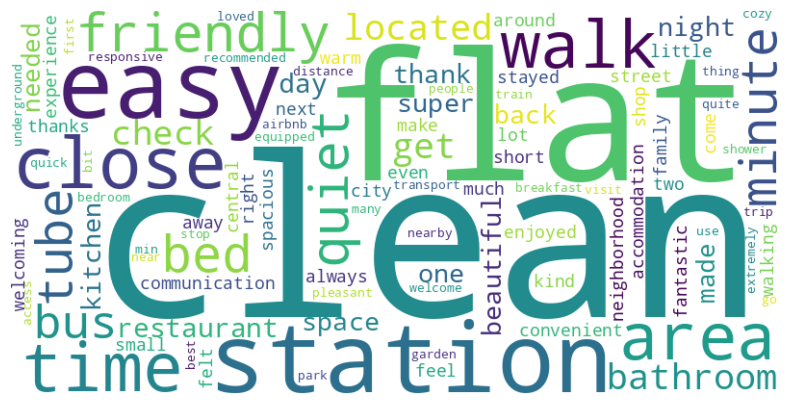

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_counts = pd.Series(filtered_word_list).value_counts().head(100)

# 워드클라우드를 생성
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
!pip install textblob

In [ ]:
reviews = random_sample['리뷰']

In [ ]:
from textblob import TextBlob
import re
from collections import Counter

# 예시 텍스트 리스트
texts = reviews

# 긍정 및 부정 단어 저장을 위한 Counter 초기화
positive_words = Counter()
negative_words = Counter()

# 전체 단어 수를 저장할 변수 초기화
total_word_count = 0

# 각 텍스트에 대해 감성 분석 수행 및 결과 출력
for i, text in enumerate(texts):
    # 텍스트 전처리 (소문자 변환, 특수 문자 제거)
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # TextBlob을 사용하여 감성 분석 수행
    blob = TextBlob(text)
    sentiment = blob.sentiment

    # 단어를 분할하여 긍정 및 부정 단어로 분류
    words = text.split()
    total_word_count += len(words)  # 현재 텍스트의 단어 수를 전체 단어 수에 더함
    for word in words:
        word_blob = TextBlob(word)
        if word_blob.sentiment.polarity > 0:
            positive_words[word] += 1
        elif word_blob.sentiment.polarity < 0:
            negative_words[word] += 1

# 긍정 단어의 총 수 계산
total_positive_words = sum(positive_words.values())

# 긍정 및 부정 단어 빈도수 출력
print("Positive words frequency:", positive_words)
print("Negative words frequency:", negative_words)
print("Total word count:", total_word_count)
print("Total positive words count:", total_positive_words)


Positive words frequency: Counter({'very': 15980, 'great': 9662, 'clean': 5726, 'nice': 4487, 'good': 4217, 'comfortable': 3815, 'really': 3527, 'lovely': 3405, 'perfect': 2834, 'easy': 2821, 'friendly': 2314, 'highly': 1809, 'excellent': 1513, 'beautiful': 1502, 'super': 1495, 'wonderful': 1395, 'amazing': 1292, 'thanks': 1178, 'much': 1174, 'enjoyed': 1158, 'kind': 1120, 'more': 1055, 'warm': 952, 'fantastic': 940, 'right': 923, 'loved': 866, 'many': 859, 'best': 789, 'near': 782, 'welcome': 775, 'quick': 712, 'pleasant': 697, 'first': 682, 'safe': 668, 'absolutely': 611, 'exactly': 599, 'most': 562, 'better': 561, 'available': 546, 'sure': 522, 'tidy': 510, 'able': 478, 'quickly': 453, 'large': 443, 'far': 441, 'modern': 439, 'love': 426, 'happy': 402, 'easily': 391, 'ideal': 379, 'perfectly': 368, 'light': 358, 'peaceful': 354, 'appreciated': 344, 'own': 333, 'early': 331, 'stylish': 329, 'pretty': 327, 'full': 323, 'clear': 314, 'attentive': 313, 'cute': 313, 'high': 298, 'bright'

In [34]:
# 부정 단어의 총 수 계산
total_negative_words = sum(negative_words.values())
total_negative_words

16337

In [35]:
# 긍정 단어와 부정 단어에서 명사만 추출
def extract_nouns(word_counter):
    nouns = Counter()
    for word in word_counter:
        word_blob = TextBlob(word)
        pos_tags = nltk.pos_tag([word])
        if pos_tags[0][1] in ['NN', 'NNS', 'NNP', 'NNPS']:  # 명사 태그
            nouns[word] += word_counter[word]
    return nouns

In [36]:
positive_nouns = extract_nouns(positive_words)
negative_nouns = extract_nouns(negative_words)

In [37]:
positive_nouns

Counter({'wonderful': 1395,
         'peaceful': 354,
         'clean': 5726,
         'perfect': 2834,
         'sure': 522,
         'super': 1495,
         'apt': 58,
         'loud': 112,
         'superb': 144,
         'beautiful': 1502,
         'cool': 226,
         'excellent': 1513,
         'thanks': 1178,
         'bright': 292,
         'absolute': 68,
         'phenomenal': 20,
         'warm': 952,
         'calm': 162,
         'quick': 712,
         'kind': 1120,
         'tidy': 510,
         'worth': 195,
         'stylish': 329,
         'right': 923,
         'fine': 246,
         'welcome': 775,
         'fast': 247,
         'accurate': 120,
         'delightful': 92,
         'light': 358,
         'pleasant': 697,
         'awesome': 221,
         'ideal': 379,
         'brilliant': 219,
         'fly': 4,
         'offers': 95,
         'cute': 313,
         'sound': 63,
         'respectful': 64,
         'wise': 17,
         'ok': 165,
         'love': 426,


In [38]:
negative_nouns

Counter({'base': 184,
         'dirty': 101,
         'spent': 232,
         'sad': 27,
         'center': 514,
         'cozy': 793,
         'dusty': 28,
         'cold': 160,
         'dark': 57,
         'toilet': 222,
         'firm': 19,
         'complaint': 23,
         'wet': 25,
         'fluffy': 13,
         'dry': 41,
         'round': 70,
         'mean': 25,
         'ill': 138,
         'rude': 14,
         'nostalgic': 1,
         'inconvenient': 28,
         'creepy': 3,
         'rank': 2,
         'bland': 2,
         'minimal': 19,
         'mess': 7,
         'past': 27,
         'half': 92,
         'sorry': 24,
         'tries': 9,
         'broken': 71,
         'faint': 2,
         'endless': 6,
         'afraid': 11,
         'narrow': 75,
         'brutal': 2,
         'filthy': 6,
         'disappointment': 15,
         'careful': 48,
         'everyday': 35,
         'thin': 72,
         'crap': 2,
         'messy': 18,
         'odd': 16,
         'minor'

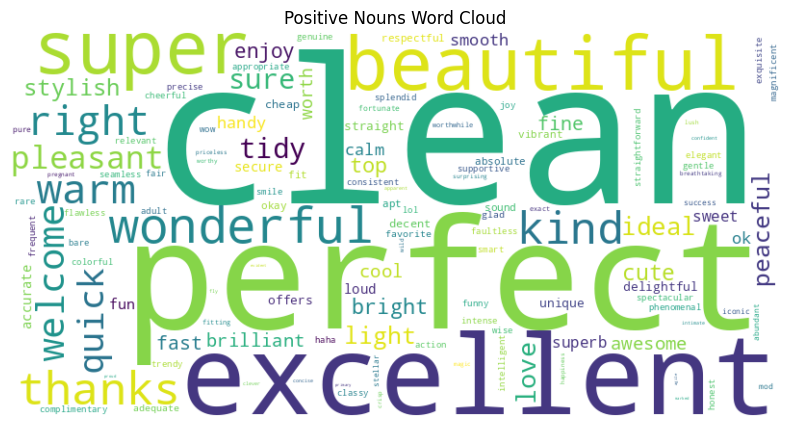

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 긍정 명사 워드클라우드 생성 및 시각화
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(positive_nouns)
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Nouns Word Cloud')
plt.show()

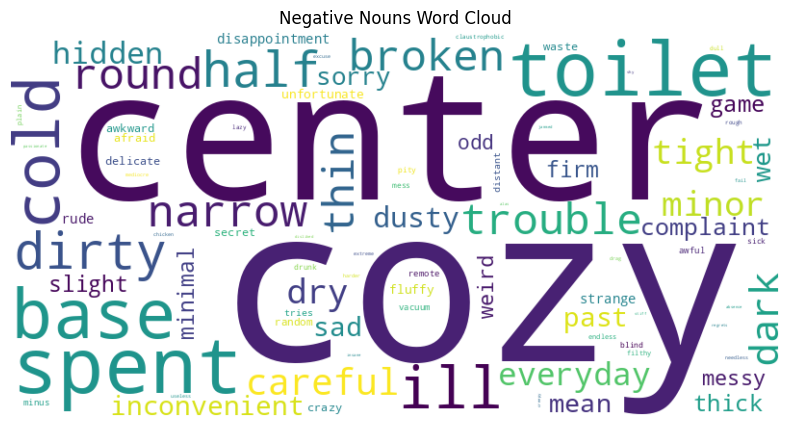

In [40]:
# 부정 명사 워드클라우드 생성 및 시각화
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(negative_nouns)
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Nouns Word Cloud')
plt.show()

TF-IDF 실행

In [ ]:
# !pip install scikit-learn

In [ ]:
import re

random_sample['리뷰'] = reviews.apply(lambda x: re.sub(r'[^a-zA-Z\s]+', '', x))
random_sample.head()

,숙소_id,리뷰날짜,리뷰
475762,28599087,2022-03-20,We had a great trip the airbnb is great and ve...
266231,14378646,2022-11-18,Great Area great hosts and a very comfy bed
555,165336,2022-08-25,Had a wonderful stay at Nathans Loved the ecle...
495255,30536724,2023-12-02,CleanComfy and a Peaceful spaceThere are room...
409887,22592225,2019-11-15,Yvonnes place was lovely and comfortable She w...


In [55]:
import re

def reviews_Pretreatment(texts):
    cleaned_texts = []
    for text in texts:
        cleaned_text = text.lower()  # 소문자로 변환
        cleaned_text = re.sub(r'[^a-zA-Z\s]+', '', cleaned_text)  # 특수문자 제거
        cleaned_texts.append(cleaned_text)
    return cleaned_texts


# 텍스트 전처리 수행
cleaned_reviews = reviews_Pretreatment(random_sample['리뷰'])

# 전처리된 텍스트로 '리뷰' 컬럼 업데이트
random_sample['리뷰'] = cleaned_reviews

# 결과 출력
random_sample.head()

,숙소_id,리뷰날짜,리뷰,감성분류
475762,28599087,2022-03-20,we had a great trip the airbnb is great and ve...,1
266231,14378646,2022-11-18,great area great hosts and a very comfy bed,1
555,165336,2022-08-25,had a wonderful stay at nathans loved the ecle...,1
495255,30536724,2023-12-02,cleancomfy and a peaceful spacethere are room...,1
409887,22592225,2019-11-15,yvonnes place was lovely and comfortable she w...,1


In [56]:
reviews = random_sample['리뷰']

분석 모델 구축

In [59]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
import re

# tf-idf 벡터화
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(reviews)

토픽 모델링

- distribution 값은 이 리뷰가 각 토픽에 속할 확률

In [60]:
# LDA 모델 생성 및 학습
lda_model = LatentDirichletAllocation(n_components=5, max_iter=5, learning_method='online', learning_offset=50., random_state=0)
lda_model.fit(tfidf)

# 리뷰별 토픽 분포 예측
topic_distribution = lda_model.transform(tfidf)

# 각 리뷰의 토픽 분포 확인
for i, review in enumerate(reviews[:10]):  # 첫 10개의 리뷰만 출력
    print(f"Review {i+1}:")
    print(review)
    print(f"Topic Distribution: {topic_distribution[i]}")
    print()

Review 1:
we had a great trip the airbnb is great and very well located 
Topic Distribution: [0.06687063 0.0669043  0.06726565 0.06687033 0.73208908]

Review 2:
great area great hosts and a very comfy bed
Topic Distribution: [0.06208429 0.06211014 0.06261544 0.06208407 0.75110606]

Review 3:
had a wonderful stay at nathans loved the eclectic decor and prime location in notting hill just steps from the tube communication was great and he was able to personally check me in and walk me through everything in the house plus he left detailed instructions everything worked great and i had a lovely and comfortable base for my time in london would definitely stay here again
Topic Distribution: [0.03205742 0.0851387  0.03296659 0.03205377 0.81778351]

Review 4:
cleancomfy and a peaceful spacethere are  rooms in the house and everything was peaceful i felt like i was the only one there there are  showers and  bathrooms so you are hardly out of luck when you need themkitchen is clean and cupboards

In [61]:
# 각 토픽에 해당하는 단어 추출
def get_top_words(model, feature_names, n_top_words):
    top_words_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        top_words_dict[f"Topic {topic_idx}"] = top_words
    return top_words_dict

n_top_words = 10
feature_names = tfidf_vectorizer.get_feature_names_out()
top_words = get_top_words(lda_model, feature_names, n_top_words)

# 각 토픽의 상위 단어 출력
for topic, words in top_words.items():
    print(f"{topic}: {', '.join(words)}")

Topic 0: discreet, justin, finish, jess, conference, helena, cheaper, boris, monica, vanessas
Topic 1: value, money, mary, setting, apt, defo, accurately, sylvan, sadaf, hilda
Topic 2: good, bit, room, bathroom, small, didnt, kitchen, shower, noise, floor
Topic 3: perfect, max, anna, billie, sally, excel, hassle, extended, bush, reception
Topic 4: great, stay, place, location, host, nice, clean, london, lovely, apartment


감성 분석

<예시> <br>

Review 1:
We had a great trip, the airbnb is great and very well located <br>
Topic Distribution: <br>
[0.0668716   0.06687163  0.06861975
 0.06687151  0.73076551] <br>

<br>

- 각 확률이 5개가 있다. (토픽이 5개가 나왔다는 의미)
- 각 수치가 높을수록 해당 토픽에 속할 확률이 높다는 것

- 5개중 가장 높은 수치가 0.7307 >> 토픽 5번에 속할 확률이 높다는 뜻

In [46]:
from textblob import TextBlob
import re

def sentiment_analysis(texts):
    sentiment_labels = []

    for text in texts:
        cleaned_text = text.lower() # 소문자로
        cleaned_text = re.sub(r'[^a-zA-Z\s]+', '', cleaned_text) # 특수문자 제거

        #감성분석
        blob = TextBlob(cleaned_text)
        sentiment = blob.sentiment

        # 감성 분석 결과를 1(긍정) 또는 0(부정)으로 저장
        if sentiment.polarity > 0:
            sentiment_labels.append(1)
        else:
            sentiment_labels.append(0)

    return sentiment_labels

texts = random_sample['리뷰']

# 함수 사용 예시
sentiment_labels = sentiment_analysis(texts)
random_sample['감성분류'] = sentiment_labels

In [48]:
random_sample['감성분류'].value_counts()

감성분류
1    19426
0      574
Name: count, dtype: int64